# Loading CDF files 

In [1]:
import pycdfpp
import requests
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib widget

Let's load some ACE data directly from [CDA](https://cdaweb.gsfc.nasa.gov/) database:

In [2]:
cdf = pycdfpp.load(requests.get('https://cdaweb.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h0/2019/ac_h0_mfi_20190116_v07.cdf').content)

You can have an overview of the CDF file by just using it's repr:

In [3]:
cdf

CDF:
  version: 2.5.22
  majority: Adaptative column
  compression: None

Attributes:
  TITLE: "ACE> Magnetometer Parameters"
  Project: [ [ "ACE>Advanced Composition Explorer", "ISTP>International Solar-Terrestrial Physics" ] ]
  Discipline: "Space Physics>Interplanetary Studies"
  Source_name: "AC>Advanced Composition Explorer"
  Data_type: "H0>16-Sec Level 2 Data"
  Descriptor: "MAG>ACE Magnetic Field Instrument"
  Data_version: "7"
  Generated_by: "ACE Science Center"
  Generation_date: "20190429"
  LINK_TEXT: "Release notes and other info available at"
  LINK_TITLE: "the ACE Science Center Level 2 Data website"
  HTTP_LINK: "http://www.srl.caltech.edu/ACE/ASC/level2/index.html"
  TEXT: [ [ "MAG - ACE Magnetic Field Experiment", "References: http://www.srl.caltech.edu/ACE/", "The quality of ACE level 2 data is such that it is suitable for serious ", "scientific study.  However, to avoid confusion and misunderstanding, it ", "is recommended that users consult with the appropriate AC

CDF attributes contains a list of entries where each entry is either a list of scalar values of the same type or a string.
Note that CDF variables attributes can only have one entry.

In [4]:
print(cdf.attributes["TITLE"][0])
print(cdf.attributes["TEXT"][1])
print(cdf["Epoch"].attributes["FILLVAL"][0])

ACE> Magnetometer Parameters
References: http://www.srl.caltech.edu/ACE/
[-1e+31]


## Accessing variables values

Except for string values:
- Variables values can either be accessed through `.values` member or using Python buffer protocol.
- With both `.values` member and Python buffer protocol 0 data copy is performed to access values.

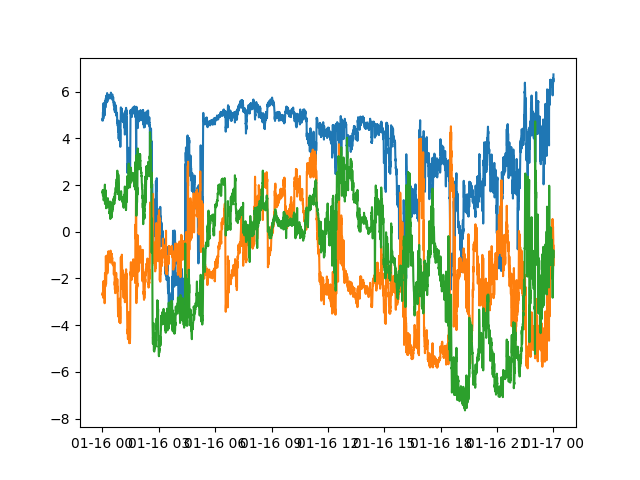

In [5]:
plt.figure()
plt.plot(pycdfpp.to_datetime64(cdf["Epoch"]), cdf["BGSM"])
plt.show()

In [6]:
cdf["BGSM"].values

array([[ 4.772, -2.697,  1.75 ],
       [ 4.851, -2.635,  1.653],
       [ 4.769, -2.64 ,  1.722],
       ...,
       [ 6.525, -0.342, -1.095],
       [ 6.419, -1.46 , -0.793],
       [ 6.737, -0.599, -1.087]], dtype=float32)

In [7]:
xr.DataArray(cdf["BGSM"])

<xarray.DataArray 'BGSM' (dim_0: 5400, dim_1: 3)>
array([[ 4.772, -2.697,  1.75 ],
       [ 4.851, -2.635,  1.653],
       [ 4.769, -2.64 ,  1.722],
       ...,
       [ 6.525, -0.342, -1.095],
       [ 6.419, -1.46 , -0.793],
       [ 6.737, -0.599, -1.087]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1